In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [53]:
import matplotlib.style as style
style.use('classic')

https://sites.google.com/site/mexicanmillionmodels/

In [5]:
co = pymysql.connect(host='3MdB.astro.unam.mx', db='3MdB_17', 
                     user='OVN_user', passwd='oiii5007') 

In [6]:
res = pd.read_sql("""SELECT 
O__3_500684A as O3,
N__2_658345A  as N2,
H__1_486133A as Hb,
H__1_656281A as Ha,
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac
FROM tab_17 
WHERE ref like 'BOND' 
""", 
con=co)

/var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_33703/3546071131.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql("""SELECT


In [7]:
print(len(res))

113420


In [8]:
res[0:10]

,O3,N2,Hb,Ha,O,N,logU_mean,Hbfrac
0,8.234364e+33,8.110851e+34,5.687525e+34,1.656934e+35,-2.6,-3.6,-3.99609,0.360501
1,4.851976e+27,6.670224e+30,5.971525e+30,1.732511e+31,-2.8,-3.3,-3.68648,0.663471
2,1.731420e+28,5.853128e+32,3.461825e+34,1.085556e+35,-2.6,-2.6,-3.99528,0.195852
3,4.574588e+32,2.186812e+35,9.691181e+34,2.826483e+35,-2.8,-2.8,-3.99653,0.593956
4,4.214314e+31,6.970596e+34,1.590474e+35,4.721178e+35,-2.6,-3.6,-3.99768,0.890954
5,3.728820e+30,3.517763e+34,6.557511e+34,1.909821e+35,-2.6,-3.6,-3.99613,0.390492
6,4.430044e+29,6.443068e+34,1.703280e+35,5.444497e+35,-2.6,-3.6,-3.99695,0.665083
7,2.497483e+33,5.431325e+34,5.151559e+34,1.492328e+35,-2.6,-3.6,-3.99597,0.325740
8,4.842827e+29,3.300205e+30,8.329248e+30,2.408564e+31,-2.6,-4.1,-3.88758,1.000000
9,5.523279e+28,4.022494e+30,2.425565e+30,7.113778e+30,-2.8,-2.8,-3.37443,0.278552


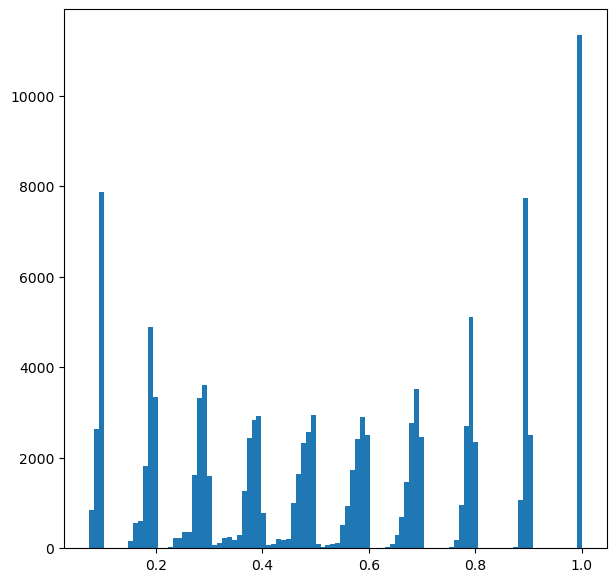

In [9]:
f, ax = plt.subplots(figsize=(7,7))
ax.hist(res['Hbfrac'], bins=100);

In [10]:
mask = res['Hbfrac'] > 0.7
res2 = res[mask]
print(len(res2))

34026


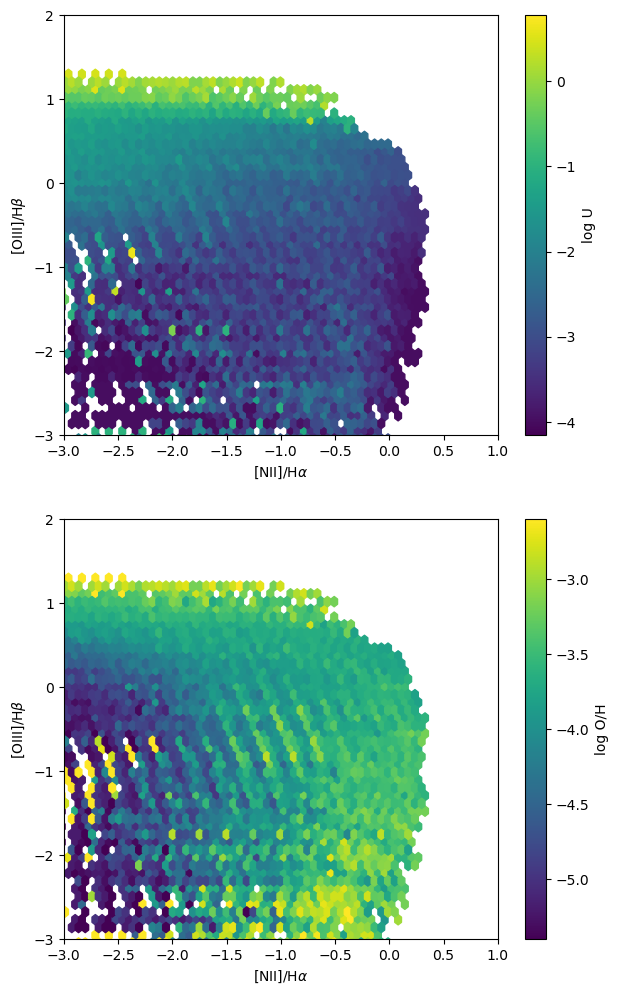

In [13]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(7,12))
cax1 = ax1.hexbin(np.log10(res2['N2']/res2['Ha']), 
           np.log10(res2['O3']/res2['Hb']), 
           C=res2['logU_mean'])
cb1 = plt.colorbar(cax1, ax=ax1)
cb1.set_label('log U')
cax2 = ax2.hexbin(np.log10(res2['N2']/res2['Ha']), 
           np.log10(res2['O3']/res2['Hb']), 
           C=res2['O'])
cb2 = plt.colorbar(cax2, ax=ax2)
cb2.set_label('log O/H')
for ax in (ax1, ax2):
    ax.set_xlabel(r'[NII]/H$\alpha$')
    ax.set_ylabel(r'[OIII]/H$\beta$')
    ax.set_xlim((-3,1))
    ax.set_ylim((-3,2))

## 2nd example

In [16]:
res4 = pd.read_sql("""SELECT 
HE_2_468564A as He2, 
BLND_372700A as O2, 
O__3_500684A as O3,
BLND_436300A as O3a,
O_3R_436300A as O3ar,
N__2_658345A  as N2,
O__1_630030A  as O1, 
O__1_631679M as O1IR,
O__3_883323M as O3IR,
(S__2_671644A +  S__2_673082A ) as S2,
H__1_486133A as Hb,
H__1_656281A as Ha,
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac,
T_HYDROGEN_vol_1 as Te, 
SUBSTRING(com3, 6) as age,
nH_mean as nH
FROM tab_17, teion_17 
WHERE tab_17.N = teion_17.N AND tab_17.ref like 'BOND' AND hbfrac > 0.8 
""", 
con=co)

/var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_33703/3352258284.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res4 = pd.read_sql("""SELECT


In [17]:
# res.age is a string, tranform it to float:
res4 = res4.apply(pd.to_numeric, errors='ignore')

In [18]:
print(len(res4))

22685


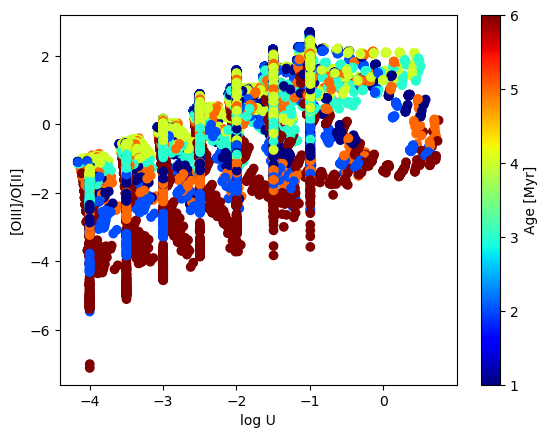

In [24]:
f, ax = plt.subplots()
cax = ax.scatter(res4['logU_mean'], 
           np.log10(res4['O3']/res4['O2']),
          c=res4['age']/1e6, edgecolor=None,
          cmap='jet');
ax.set_xlabel('log U')
ax.set_ylabel('[OIII]/O[II]')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')

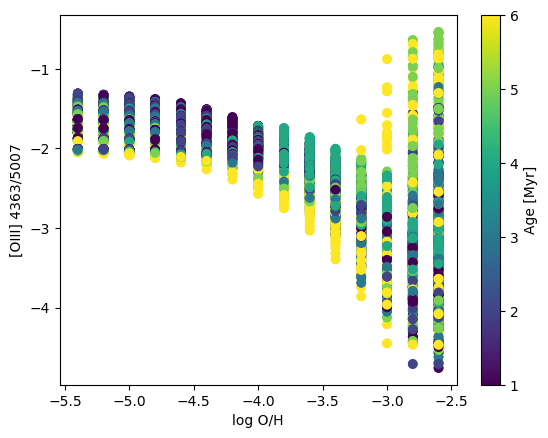

In [27]:
f, ax = plt.subplots()
cax = ax.scatter(res4['O'], 
           np.log10(res4['O3a']/res4['O3']),
          c=res4['age']/1e6, edgecolor=None);
ax.set_xlabel('log O/H')
ax.set_ylabel('[OIII] 4363/5007')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')

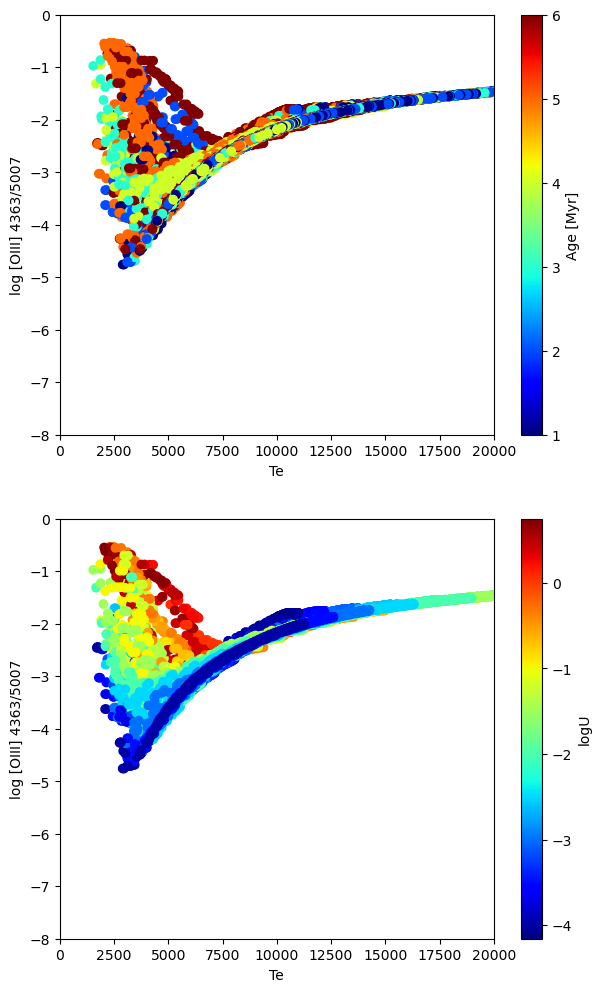

In [29]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(7,12))
cax1 = ax1.scatter(res4['Te'], 
           np.log10((res4['O3a'])/res4['O3']),
          c=res4['age']/1e6, edgecolor=None, cmap='jet');
ax1.set_xlabel('Te')
ax1.set_ylabel('log [OIII] 4363/5007')
cb1 = plt.colorbar(cax1, ax=ax1)
cb1.set_label('Age [Myr]')
ax1.set_xlim((0, 20000))
ax1.set_ylim((-8, 0))
cax2 = ax2.scatter(res4['Te'], 
           np.log10((res4['O3a']-res4['O3ar'])/res4['O3']),
          c=res4['logU_mean'], edgecolor=None, cmap='jet');
ax2.set_xlabel('Te')
ax2.set_ylabel('log [OIII] 4363/5007')
cb2 = plt.colorbar(cax2, ax=ax2)
cb2.set_label('logU')
ax2.set_xlim((0, 20000))
ax2.set_ylim((-8, 0));

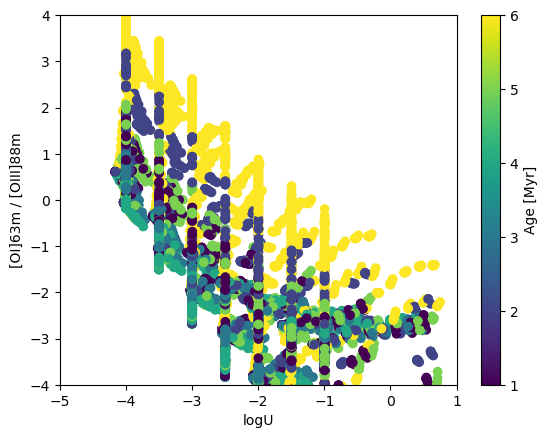

In [30]:
f, ax = plt.subplots()
cax = ax.scatter(res4['logU_mean'], 
           np.log10(res4['O1IR']/res4['O3IR']),
          c=res4['age']/1e6, edgecolor=None);
ax.set_xlabel('logU')
ax.set_ylabel('[OI]63m / [OIII]88m')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')
ax.set_xlim((-5, 1))
ax.set_ylim((-4, 4));

1512


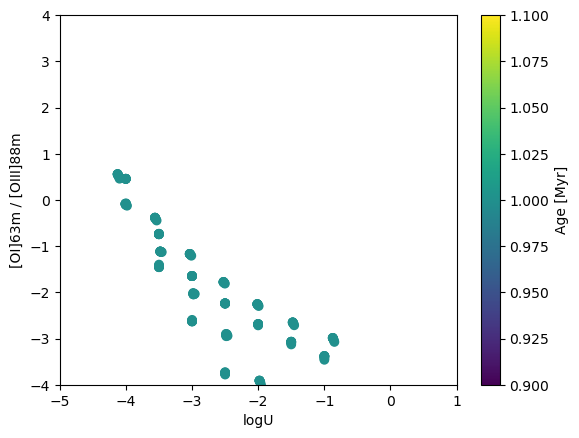

In [31]:
# Let's restrict the age and the abundance of the models
mask_age = res4['age'] == 1e6
mask_ab = res4['O'] == -4
print(mask_ab.sum())
mask = mask_age & mask_ab
res4b = res4[mask]
f, ax = plt.subplots()
cax = ax.scatter(res4b['logU_mean'], 
           np.log10(res4b['O1IR']/res4b['O3IR']),
          c=res4b['age']/1e6, edgecolor=None);
ax.set_xlabel('logU')
ax.set_ylabel('[OI]63m / [OIII]88m')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')
ax.set_xlim((-5, 1))
ax.set_ylim((-4, 4));

## Other example

#### Using the PNe_2014 project to explore the relation between the O++ and N+ temperatures

In [34]:
res3 = pd.read_sql("""SELECT 
OXYGEN as O, 
T_OXYGEN_vol_2 as TOpp, 
T_NITROGEN_vol_1 as TNp, 
logU_mean as logU 
FROM tab_17, teion_17 
WHERE tab_17.N = teion_17.N AND tab_17.ref like "PNe_%" AND com6 = 1 AND hbfrac > 0.7""", 
                  con=co)

/var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_33703/2798476870.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res3 = pd.read_sql("""SELECT


In [35]:
print(len(res3))

103104


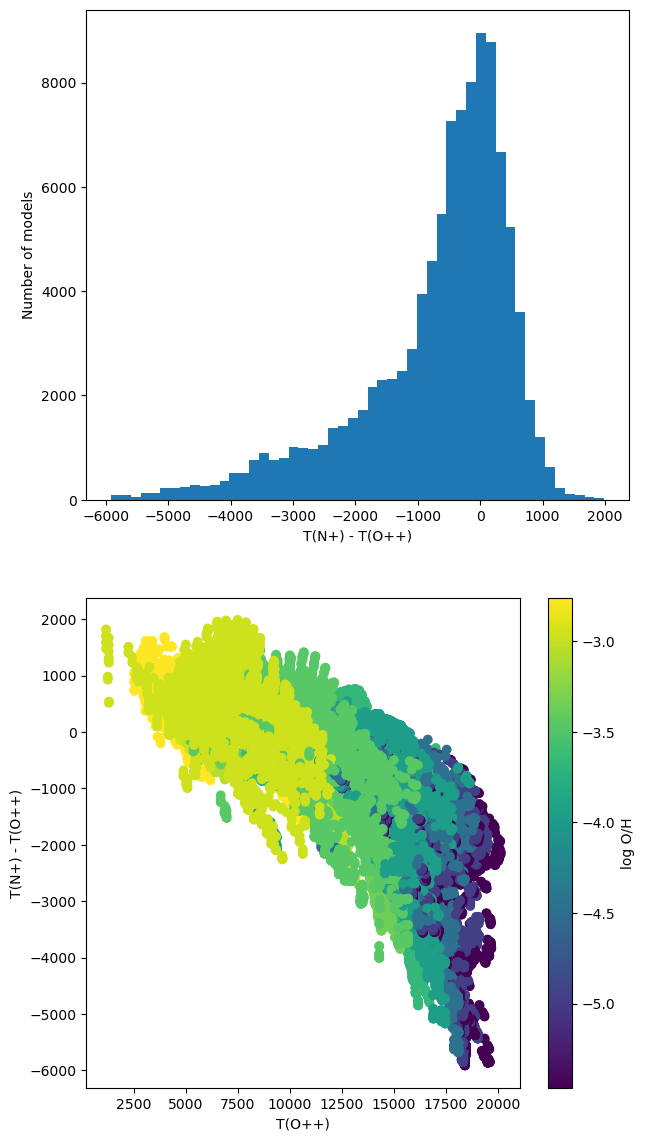

In [36]:
f, (ax2, ax1) = plt.subplots(2,1, figsize=(7,14))
cax1=ax1.scatter(res3['TOpp'], res3['TNp']-res3['TOpp'], c=res3['O'], 
                 edgecolor=None) 
cax2=ax2.hist(res3['TNp']-res3['TOpp'], bins=50)
ax1.set_xlabel('T(O++)')
ax1.set_ylabel('T(N+) - T(O++)')
ax2.set_xlabel('T(N+) - T(O++)')
ax2.set_ylabel('Number of models')
cb1 = plt.colorbar(cax1, ax=ax1);
cb1.set_label('log O/H')

In [37]:
co.close()